In [9]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from pylab import cm
from utils.dataloader import DatasetOdometry

In [10]:
gt = np.loadtxt('/home/dhagash/tmp/VIO_MSR/datasets/phenorob/front/groundtruth.txt')
vo_poses_1 = np.loadtxt('/home/dhagash/Downloads/eval_data/front/apples_big_2021-10-14-all/superpoint/PnP/poses_skip_1.txt')
vo_poses_2 = np.loadtxt('/home/dhagash/Downloads/eval_data/front/apples_big_2021-10-14-all/superpoint/PnP/poses_skip_10.txt')
vo_poses_3 = np.loadtxt('/home/dhagash/Downloads/eval_data/front/apples_big_2021-10-14-all/superpoint/PnP/poses_skip_20.txt')
vo_poses_4 = np.loadtxt('/home/dhagash/Downloads/eval_data/front/apples_big_2021-10-14-all/superpoint/PnP/poses_skip_30.txt')
vo_poses_5 = np.loadtxt('/home/dhagash/Downloads/eval_data/front/apples_big_2021-10-14-all/superpoint/PnP/poses_skip_40.txt')
vo_poses_6 = np.loadtxt('/home/dhagash/Downloads/eval_data/front/apples_big_2021-10-14-all/superpoint/PnP/poses_skip_50.txt')

In [3]:
T_rot =  np.array([[0, -1, 0], [1, 0, 0], [0, 0, 1]]) @ np.array([[0, 0, -1], [0, 1, 0], [1, 0, 0]])


In [11]:
vo_poses_1 = vo_poses_1[:,1:4] @ T_rot
vo_poses_2 = vo_poses_2[:,1:4] @ T_rot
vo_poses_3 = vo_poses_3[:,1:4] @ T_rot
vo_poses_4 = vo_poses_4[:,1:4] @ T_rot
vo_poses_5 = vo_poses_5[:,1:4] @ T_rot
vo_poses_6 = vo_poses_6[:,1:4] @ T_rot

In [12]:
x_1 = vo_poses_1[:, 0]
y_1 = vo_poses_1[:, 1]
z_1 = vo_poses_1[:, 2]

x_2 = vo_poses_2[:, 0]
y_2 = vo_poses_2[:, 1]
z_2 = vo_poses_2[:, 2]

x_3 = vo_poses_3[:, 0]
y_3 = vo_poses_3[:, 1]
z_3 = vo_poses_3[:, 2]

x_4 = vo_poses_4[:, 0]
y_4 = vo_poses_4[:, 1]
z_4 = vo_poses_4[:, 2]

x_5= vo_poses_5[:, 0]
y_5= vo_poses_5[:, 1]
z_5= vo_poses_5[:, 2]

x_6 = vo_poses_6[:, 0]
y_6 = vo_poses_6[:, 1]
z_6 = vo_poses_6[:, 2]

gt_x = gt[:, 1]
gt_y = gt[:, 2]
gt_z = gt[:, 3]

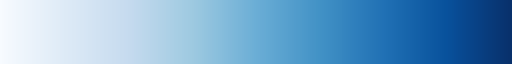

In [15]:
mpl.rcParams['font.family'] = 'Helvetica'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.linewidth'] = 2
cmap = cm.get_cmap('Dark2')
gradient = cm.get_cmap("Blues")
cmap
gradient

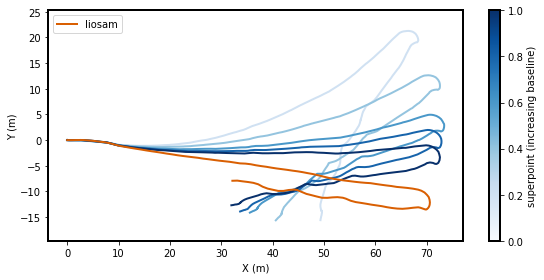

In [29]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_axes([0, 0, 0.6, 0.4])
ax.plot(x_1, y_1,linewidth=2,color= gradient(1.0/5))
ax.plot(x_2, y_2,linewidth=2,color= gradient(2.0/5))
ax.plot(x_3, y_3,linewidth=2,color= gradient(3.0/5))
ax.plot(x_4, y_4,linewidth=2,color= gradient(4.0/5))
ax.plot(x_5, y_5,linewidth=2,color= gradient(5.0/5))
# ax.plot(x_6, y_6,linewidth=2,color= gradient(15))
ax.plot(gt_x, gt_y,linewidth=2,color= cmap(1),label='liosam')
ax.axis('equal')
ax.legend()
ax.set_xlabel('X (m)', labelpad=5)
ax.set_ylabel('Y (m)', labelpad=3)
cbar = plt.colorbar(cm.ScalarMappable(norm=None,cmap=gradient))
cbar.ax.set_ylabel("superpoint (increasing baseline)",fontsize=10)
plt.savefig('trajectory_plot.png', dpi=1000, transparent=False, bbox_inches='tight')
plt.show()

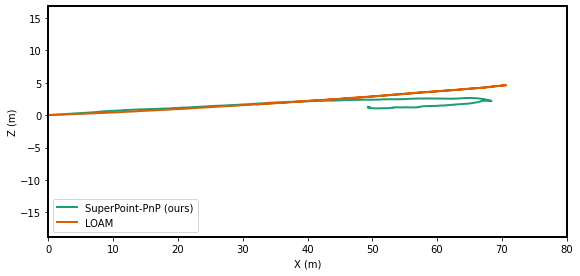

In [58]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_axes([0, 0, 0.6, 0.4])
ax.plot(x, z,linewidth=2,color= cmap(0),label='SuperPoint-PnP (ours)')
ax.plot(gt_x, gt_z,linewidth=2,color= cmap(1),label='LOAM')
ax.axis('equal')
ax.set_xlim(0, 80)
ax.set_ylim(-5, 3)
# ax.set_aspect('equal', 'datalim',anchor='NE')
ax.legend(loc='lower left')
ax.set_xlabel('X (m)', labelpad=5)
ax.set_ylabel('Z (m)', labelpad=3)
plt.savefig('z_drift.png', dpi=300, transparent=False, bbox_inches='tight')
plt.show()

In [2]:
datarootpath = '../../datasets/phenorob/front/'
method = ['superpoint','orb']

In [3]:
dataset_name = 'apples_big_2021-10-14-14-52-56_3/'

